# Example usage - yeast spotting assay

In [11]:
from bioimage_quant import bioimage_quant as bq
%matplotlib inline
import glob

### Import and crop images

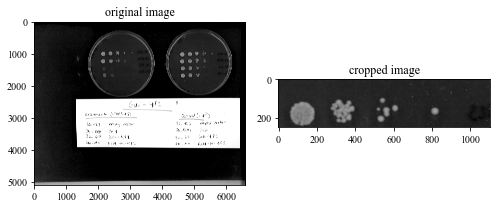

In [14]:
# change this to wherever your file lives
file = "yeast_spotting_example.png"

# change the four numbers below to specify image cropping
# leave some extra blank space somewhere that you can use for background subtraction

"""
Crop image.
x and y values correspond to two points in gel
at which cropping will happen - (x1,y1) is the top
left point, while (x2,y2) is the bottom right point,
thus cropping the image between the two points.
"""

x1 = 4730
y1 = 850
x2 = 5830
y2 = 1100

#####
 
f = glob.glob(file)[0]

image1 = bq.image_cropping(f, x1, y1, x2, y2)

### Calculate pixel intensities for each spot, convert to grayscale and sum intensities

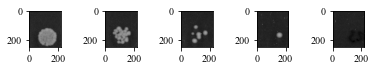

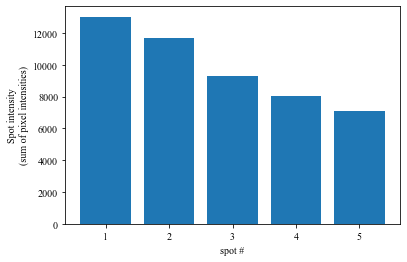

In [18]:
# Edit number of samples per image below.
# Also provide a pixel range where there are no spots for background subtraction - 
# these values correspond to the y values in the cropped images above
# in this example, we're using y-axis pixel rows 0-30 for background subtraction

num_samples = 5

baseline1 = 0
baseline2 = 30

# outputs background-subtrated average pixel intensities per column for your image

data1 = bq.spot_calculator(image1, num_samples, baseline1, baseline2)
# See images below for sanity check on your spot cropping